In [ ]:
# time series prediction
# two tasks:

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

from sklearn.preprocessing import MinMaxScaler

In [13]:
# load data
df = pd.read_csv(
    'data/gas_price_2017_2023.csv',
    index_col = 'Date',
    parse_dates = ['Date'],
    date_parser = lambda dates: pd.to_datetime(dates, format = "%m/%d/%Y"))

In [14]:
df.drop(df.tail(115).index, inplace = True)

In [24]:
df1 = df.dropna()

In [25]:
df1.isnull().values.sum()

0

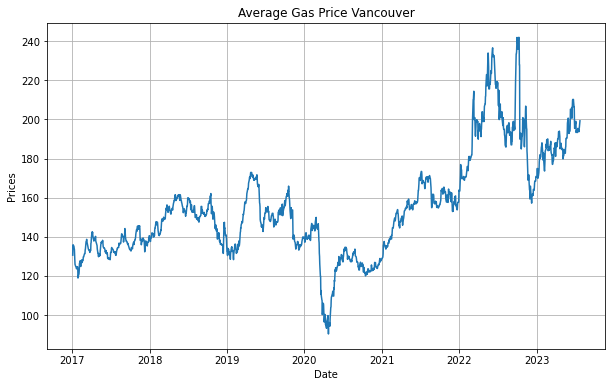

In [26]:
# plot price
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df1['VANCOUVER'])
plt.title('Average Gas Price Vancouver')
plt.show()

<AxesSubplot:ylabel='Density'>

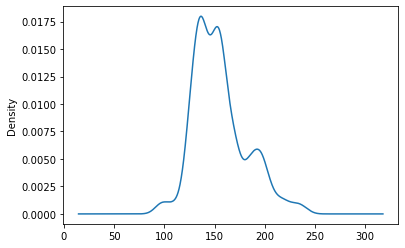

In [27]:
# distribution of dataset
df_price = df1['VANCOUVER']
df_price.plot(kind = 'kde')

<Figure size 432x288 with 0 Axes>

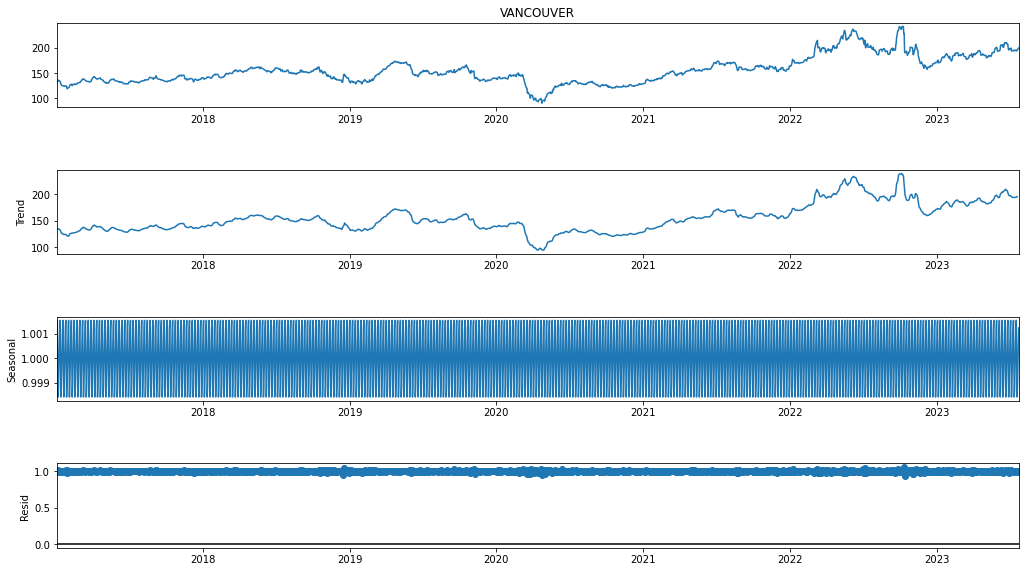

In [29]:
# Isolating trend and seasonality
result = seasonal_decompose(df_price, model = 'multiplicative')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


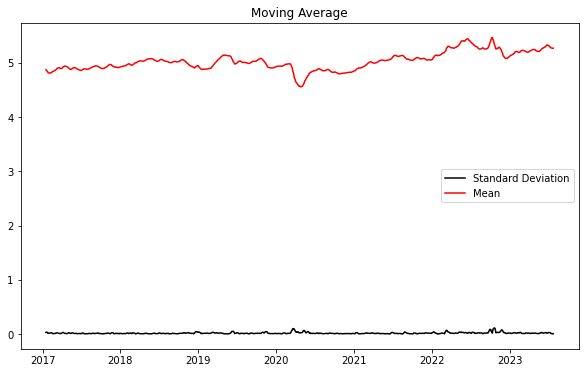

In [30]:
# Elimitating trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_price)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.plot(std_dev, color = 'black', label = 'Standard Deviation')
plt.plot(moving_avg, color = 'red', label = 'Mean')
plt.legend()
plt.show()

In [ ]:
# Split into train and test


In [8]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/